# Weight Loss Classifier
### Written by Houston Langford

This model is trained on data from a weight loss study done by an individual. Data from https://www.kaggle.com/datasets/chrisbow/2018-calorie-exercise-and-weight-changes?resource=download

### Load in Data

In [1]:
import numpy as np
import pandas as pd
from google.colab import files


dataset = pd.read_csv (r'/content/drive/My Drive/Colab Notebooks/diet_data.csv')
print(dataset)

           Date  Stone  Pounds  Ounces  weight_oz  calories cals_per_oz  \
0     7/30/2018   12.0     2.0     6.0     2726.0    1950.0        0.72   
1     7/31/2018   12.0     0.0     8.0     2696.0    2600.0        0.96   
2      8/1/2018   12.0     1.0     0.0     2704.0    2500.0        0.92   
3      8/2/2018   12.0     1.0     0.0     2704.0    1850.0        0.68   
4      8/3/2018   11.0    12.0     8.0     2664.0    2900.0        1.09   
..          ...    ...     ...     ...        ...       ...         ...   
146  12/23/2018    NaN     NaN     NaN        0.0       NaN     #DIV/0!   
147  12/24/2018    NaN     NaN     NaN        0.0       NaN     #DIV/0!   
148  12/25/2018    NaN     NaN     NaN        0.0       NaN     #DIV/0!   
149  12/26/2018    NaN     NaN     NaN        0.0       NaN     #DIV/0!   
150         NaN    NaN     NaN     NaN        0.0       NaN         NaN   

     five_donuts  walk  run  wine  prot  weight  change  
0            1.0   1.0  0.0   0.0   0.0  

### Data Preprocessing: Remove Null Values

In [2]:
dataset.dropna(axis = 0, inplace = True)
print(dataset)

           Date  Stone  Pounds  Ounces  weight_oz  calories cals_per_oz  \
0     7/30/2018   12.0     2.0     6.0     2726.0    1950.0        0.72   
1     7/31/2018   12.0     0.0     8.0     2696.0    2600.0        0.96   
2      8/1/2018   12.0     1.0     0.0     2704.0    2500.0        0.92   
3      8/2/2018   12.0     1.0     0.0     2704.0    1850.0        0.68   
4      8/3/2018   11.0    12.0     8.0     2664.0    2900.0        1.09   
..          ...    ...     ...     ...        ...       ...         ...   
138  12/15/2018   11.0    11.0     0.0     2640.0    5750.0        2.18   
139  12/16/2018   11.0    12.0     0.0     2656.0    2950.0        1.11   
140  12/17/2018   11.0    12.0     0.0     2656.0    1950.0        0.73   
141  12/18/2018   11.0    10.0     8.0     2632.0    1900.0        0.72   
142  12/19/2018   11.0    10.0     4.0     2628.0    1500.0        0.57   

     five_donuts  walk  run  wine  prot  weight  change  
0            1.0   1.0  0.0   0.0   0.0  

In [3]:
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

### Data Preprocessing: Set y to either 1 or -1
If there's a negative weight change set y to -1, and if there's a positive or no change, set to 1.

In [4]:
def classify_y(df):
  df[df<0]=-1
  df[df>=0]=1
  return df
Y = classify_y(Y)
print(Y)

0     -1.0
1      1.0
2      1.0
3     -1.0
4      1.0
      ... 
138    1.0
139    1.0
140   -1.0
141   -1.0
142   -1.0
Name: change, Length: 140, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Preprocessing: Split into X and Y train and test Values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

### Create Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegressor = LogisticRegression(max_iter=500)
logisticRegressor.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Accuracy of model

In [37]:
test_score = logisticRegressor.score(X_test, y_test)
train_score = logisticRegressor.score(X_train, y_train)
print("Test set Accuracy: " +str(test_score))
print("Training set Accuracy: " +str(train_score))

Test set Accuracy: 0.8928571428571429
Training set Accuracy: 0.875


### Create Decision Tree Model with different max depths

In [8]:
from sklearn.tree import DecisionTreeClassifier
val_accuracies = []
test_accuracies = []
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train, y_train)
  val_accuracies.append(tree.score(X_train, y_train))
  test_accuracies.append(tree.score(X_test, y_test))

### Plot accuracy as a function of max depth

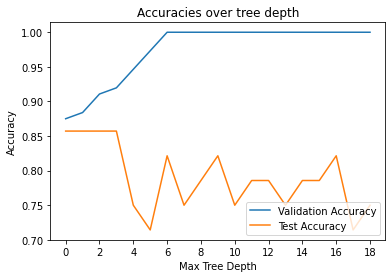

Max Val Accuracy: 1.0
Max Test Accuracy: 0.8571428571428571


In [9]:
import matplotlib.pyplot as plt
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracies over tree depth')
plt.xticks(np.arange(0, len(test_accuracies), 2))
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.legend(loc='lower right')
plt.show()

print("Max Val Accuracy: " + str(val_accuracies[6]))
print("Max Test Accuracy: " + str(test_accuracies[3]))

### Create Kernel Perceptron Model

In [29]:
from sklearn.linear_model import Perceptron
iters = 5
val_accuracies = []
test_accuracies = []
tick_marks = []
while iters<=100:
  perceptron = Perceptron(max_iter = iters, eta0 = .1)
  perceptron.fit(X_train, y_train)
  val_accuracies.append(perceptron.score(X_train, y_train))
  test_accuracies.append(perceptron.score(X_test, y_test))
  tick_marks.append(iters)
  iters+=5



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


### Accuracy of Perceptron

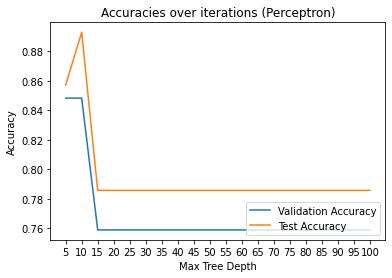

Max Val Accuracy: 0.8482142857142857
Max Test Accuracy: 0.8928571428571429


In [35]:
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracies over iterations (Perceptron)')

plt.xticks(np.arange(0, len(test_accuracies)), tick_marks)
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.legend(loc='lower right')
plt.show()

print("Max Val Accuracy: " + str(val_accuracies[1]))
print("Max Test Accuracy: " + str(test_accuracies[1]))